<a href="https://colab.research.google.com/github/MazonSzymon/Project_COVID_portfolio/blob/main/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  ***Analysis of investing at GPW in 2020*** 

---













#Downloading libraries and creating wig20 table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
%load_ext google.colab.data_table

In [2]:
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')


In [4]:
#Creat a DataFrame with names of WIG 20 one joint stock company
stocks_at_WIG20 = pd.DataFrame(np.array([
    ['WIG20' , 'wig20.pl'],
    ['Alior Bank' , 'alr.pl'],
    ['CCC' , 'ccc.pl'],
    ['CD Projekt' , 'cdr.pl'],
    ['Cyfrowy Polsat SA' , 'cps.pl'],
    ['Dino Polska' , 'dnp.pl'],
    ['Jastrzebska Spolka Weglowa' , 'jsw.pl'],
    ['KGHM Polska Mied' , 'kgh.pl'],
    ['LPP' , 'lpp.pl'],
    ['Grupa Lotos SA' , 'lts.pl'],
    ['mBank' , 'mbk.pl'],
    ['Orange Polska' , 'opl.pl'],
    ['Bank Polska Kasa Opieki' , 'peo.pl'],
    ['PGE Polska Grupa Energetyczna' , 'pge.pl'],
    ['Polskie Gronictwo Naftowe i Gazownictwo' , 'pgn.pl'],
    ['Powszechna Kasa Oszczednosci Bank Polski' , 'pko.pl'],
    ['Play Communications SA' , 'ply.pl'],
    ['Powszechny Zaklad Ubezpieczen' , 'pzu.pl'],
    ['Santander Bank Polska' , 'spl.pl'],
    ['Tauron Polska Energia' , 'tpe.pl']
    ]), columns = ['Full_name','Short_name'])

# Functions

> ## Downloading data

In [5]:
def get_data(stock,start_date, end_date):
  stooq_data = pdr.get_data_stooq(stock['Short_name'], start = start_date, end = end_date).sort_index()
  stooq_data['Stock_name'] = stock['Full_name']
  df = stooq_data.copy()
  df.rename(columns = { stock['Short_name'] : 'stooq_data'},inplace = True)
  return df

>## WIG20 Tabel

>> ### Creating WIG20 frame

In [6]:
def WIG20_frame(start_date,end_date):
  WIG20 = pd.DataFrame()
  for i in range(len(stocks_at_WIG20)):
    tmp = get_data(stocks_at_WIG20.iloc[i],start_date,end_date)
    WIG20 = WIG20.append(tmp)
  return WIG20

>>### Basic information

In [152]:
def stock_info(stock):
  df = WIG20_by_stocks.get_group(stock)
  print("-"*50)
  print("5 First and 5 Last records")
  print("-"*50)
  print(df.head())
  print("-"*50)
  print(df.tail())
  print("-"*50)
  print("Basic information about data set")
  print("-"*50)
  print(df.info())
  print("-"*50)
  print("Basic statistic about data")
  print("-"*50)
  print(df.describe())
  print("-"*50+"\n")

>>### Visualization of stock actions

In [153]:
def stock_visualization(stock):
  df = WIG20_by_stocks.get_group(stock)
  plt.figure(figsize=(28,8))
  #1 Visualization close value
  plt.subplot(1,2,1)
  plt.plot(df['Close'], color = 'blue')
  plt.title(stock + " close value")
  plt.grid()
  #2 Visulization volume value
  plt.subplot(1,2,2)
  plt.plot(df['Volume'], color = 'green')
  plt.title(stock + ' volume value')
  plt.grid()
  return plt.show()

>> ### Relative change

In [154]:
def stock_rate(stock):
  df = WIG20_by_stocks.get_group(stock)
  plt.figure(figsize=(28,8))
  #1 Visualization Rate of Return
  plt.subplot(121)
  plt.plot(np.log(df['Close'].pct_change()+1), color = 'blue')
  plt.title(stock + " Rate of Return")
  plt.grid()
  #2 Histogram Rate of Return
  plt.subplot(122)
  plt.hist(np.log(df['Close'].pct_change()+1), color = 'gray', bins = 50)
  plt.title(stock + ' Rate of Return')
  plt.grid()
  return plt.show()

>## Portfolio

>> ### Creat investment

In [7]:
def creat_investment(stocks,investment):
  df = pd.DataFrame(columns=['Stock','Value'])
  df['Stock'] = stocks
  df['Value'] = investment
  df['Value'] = df['Value'].astype('float')
  df.sort_values('Stock', inplace = True)
  return df

>> ### Preparing portfolio



In [208]:
def preparing_portfolio(total_investments,stocks):
  
  #Get data to stock
  def get_frame(stock):
    return WIG20_by_stocks.get_group(stock)
  
  stocks_data = map(get_frame,stocks)
  df = pd.concat(stocks_data, keys = stocks, names= ['Stock','Date'])
  df = df.reset_index().pivot(index='Date',columns = 'Stock', values = ['Close','Volume'])
  portfolio_change = (1 + df[['Close']].pct_change()).cumprod().fillna(1).round(2).rename(columns = {'Close' : 'ROI'})
  integrer_of_stocks = (total_investments/df['Close'].iloc[0]).astype(int).values
  investment_by_stocks = integrer_of_stocks  * df['Close'].iloc[0]
  rest_investment = total_investments - investment_by_stocks.values
  rest_investment
  investment_value = portfolio_change.multiply(investment_by_stocks.values).rename(columns = {'ROI' : 'Investments_value'}).round(2)
  investment_value['Sum_of_investments'] = investment_value.sum(axis=1).round(2)
  portfolio_value = pd.concat([df,portfolio_change,investment_value], axis = 1)
  portfolio_value['ROI_of_investments'] = (1 + portfolio_value[['Sum_of_investments']].pct_change()).cumprod().fillna(1).round(2)
  tmp = portfolio_value.columns.to_frame()['Stock'].values
  print("-"*50)
  print("We first want to inveset {first_invest_value} PLN".format( first_invest_value = total_investments.sum()))
  print("We get")
  for i in range(len(integrer_of_stocks)):
    print("{integrer} stocks {company} for {price} PLN total {total} PLN".format(
        integrer = integrer_of_stocks[i], company = portfolio_value[['Investments_value'][0]].columns[i], price = portfolio_value['Close'].iloc[0][i], total = portfolio_value['Investments_value'][tmp[i]][0]))
  print("and the rest from investment {rest} PLN".format(rest = rest_investment.sum().round(2)))
  return portfolio_value

>> ### portfolio_summary

In [219]:
def portfolio_summary(portfolio):
  #Stocks list
  tmp = portfolio.columns.to_frame()['Stock'].values
  portfolio_list = ''
  for i in range(int(len(tmp)/4)):
    portfolio_list = portfolio_list + tmp[i]
    if i < len(tmp)/4 -2:
      portfolio_list = portfolio_list + ", "

  #Basic information about investment
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN, spliced by company".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0]
  ))
  for i in range(int(len(tmp)/4)):
      print("{value} PLN at stocks {company}".format(value = portfolio['Investments_value'][tmp[i]][0], company = tmp[i]))
  
  #Information about our initial stock 
  print("-"*50)
  print("We have ")
  for i in range(int(len(tmp)/4)):
      print("{integrer} stocks {company}".format(integrer = int(portfolio['Investments_value'][tmp[i]][0]/portfolio['Close'][tmp[i]][i]), company = tmp[i]))
  print("-"*50)
  print("On {end_date} it is all worth {investment_value} PLN,spliced by company".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1]
  ))
  for i in range(int(len(tmp)/4)):
      print("{value} PLN at stocks {company}".format(value = portfolio['Investments_value'][tmp[i]][-1], company = tmp[i]))
  
  print("-"*50)
  print("Rate of investment is {ROI} %, spliced by comapny".format(
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  for i in range(int(len(tmp)/4)):
      print("{ROI} % at stocks {company}".format(ROI = ((portfolio['Investments_value'][tmp[i]][-1]/portfolio['Investments_value'][tmp[i]][0] -1)*100).round(2), company = tmp[i]))
  
  print("-"*50 + "\n")
  #Graphs
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  for i in range(int(len(tmp)/4)):
    plt.plot(portfolio[['Investments_value'][0]][portfolio[['Investments_value'][0]].columns[i]], label = portfolio[['Investments_value'][0]].columns[i])
  plt.grid()
  plt.legend()
  plt.title('Value of investments by stocks')
  #2
  plt.subplot(122)
  plt.plot(portfolio['Sum_of_investments'])
  plt.title('Value of investment')
  plt.grid()
  plt.show()

  return

>> ### Portfolio compare

In [10]:
def portfolio_compare(portfolio, benchmark):
  #Stocks list
  tmp = portfolio.columns.to_frame()['Stock'].values
  portfolio_list = ''
  for i in range(int(len(tmp)/4)):
    portfolio_list = portfolio_list + tmp[i]
    if i < len(tmp)/4 -2:
      portfolio_list = portfolio_list + ", "
  
  tmp = benchmark.columns.to_frame()['Stock'].values
  benchmark_list = ''
  for i in range(int(len(tmp)/4)):
    benchmark_list = benchmark_list + tmp[i]
    if i < len(tmp)/5 -2:
      benchmark_list = benchmark_list + ", "
  

  #compare
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stocks}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0], stocks = portfolio_list
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN, Rate of investment is {ROI} %".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1],
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  
     
  print("Ratio investment to benchmark is {change}%".format(
     change = ((portfolio['Sum_of_investments'][-1]/benchmark['Sum_of_investments'][-1] - 1)*100).round(2)))
  print("-"*50+ "\n")
  #graphs
  plt.figure(figsize=(15,10))
  plt.plot(portfolio['Sum_of_investments'], color = 'green', label = portfolio_list)
  plt.plot(benchmark['Sum_of_investments'], color = 'red',label = benchmark_list)
  plt.title("Value of investment " + portfolio_list, fontsize = 22, fontweight="bold")
  plt.grid()
  plt.legend()

  return

>>###Change interval

In [11]:
def change_interval(portfolio):
  print("-"*50)
  print("Week's mean" + "\n")
  print(portfolio.resample('W').mean().tail())
  
  print("-"*50+"\n")
  print("Month's last value" + "\n")
  print(portfolio.resample('M').last().tail())
  print("-"*50)
  return 

>>### Visualization of stock actions at our portfolio

In [155]:
def portfolio_visualization(portfolio):
  tmp = portfolio.columns.to_frame()['Stock'].values
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  for i in range(int(len(tmp)/4)):
    plt.plot(portfolio[['Close'][0]][portfolio[['Close'][0]].columns[i]], label = portfolio[['Close'][0]].columns[i])
  plt.grid()
  plt.legend()
  plt.title('Value of  by stocks')
  #2
  plt.subplot(122)
  plt.plot(portfolio['Sum_of_investments'])
  plt.title('Value of investment')
  plt.grid()
  return plt.show()

>>### Relative change our portfolio

In [156]:
def portfolio_rate(portfolio):
  tmp = portfolio.columns.to_frame()['Stock'].values

  # Graphs
  for i in range(int(len(tmp)/4)):
    if (i) > len(tmp)/2-1:
      break
    else:
      #1
      plt.figure(figsize=(28,8))
      for k in range(0,2):
        if (k+i*2) > int(len(tmp)/4)-1:
          break
        else:
          plt.plot(np.log(portfolio['Close'].pct_change()+1)[portfolio[['Close'][0]].columns[i*2 + k]], label = portfolio[['Close'][0]].columns[i*2+k])
          plt.grid()
          plt.legend()
          plt.title('ROI')
      plt.show()
      #2 
      plt.figure(figsize=(28,8))
      for k in range(0,2):
        if (k+i*2) > int(len(tmp)/4)-1:
          break
        else:
          plt.subplot(121 + k)
          plt.hist(np.log(portfolio['Close'].pct_change()+1)[portfolio[['Close'][0]].columns[i*2 + k]], label = portfolio[['Close'][0]].columns[i*2+k])
          plt.grid()
          plt.legend()
          plt.title('ROI')
      plt.show()


  return plt.show()

# WIG20

In [15]:
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
#WIG20_tabel = WIG20_frame(start_date,end_date) #Run once time because its API

In [16]:
WIG20_tabel

,Open,High,Low,Close,Volume,Stock_name
Date,,,,,,
2020-01-02,2161.550,2200.570,2161.420,2200.100,21369888,WIG20
2020-01-03,2192.310,2192.310,2159.030,2173.970,20627251,WIG20
2020-01-07,2171.720,2176.800,2143.110,2145.010,19556434,WIG20
2020-01-08,2140.290,2140.290,2114.240,2115.990,20739943,WIG20
2020-01-09,2132.020,2157.610,2132.020,2157.610,19887696,WIG20
...,...,...,...,...,...,...
2020-10-12,2.096,2.126,2.040,2.062,3668557,Tauron Polska Energia
2020-10-13,2.086,2.092,1.965,1.965,3351472,Tauron Polska Energia
2020-10-14,1.973,2.092,1.971,2.048,6105461,Tauron Polska Energia


In [17]:
WIG20_by_stocks = WIG20_tabel.groupby('Stock_name') #This is our basic tabel to creating portfolios !!!!!!!!!!!!!!!!!

In [157]:
stock_info('Alior Bank')

--------------------------------------------------
5 First and 5 Last records
--------------------------------------------------
             Open   High    Low  Close  Volume  Stock_name
Date                                                      
2020-01-02  28.84  30.12  28.68  29.90  313011  Alior Bank
2020-01-03  29.90  30.00  29.10  29.10  258025  Alior Bank
2020-01-07  29.40  29.50  28.50  28.52  296709  Alior Bank
2020-01-08  28.40  28.48  27.80  27.96  348488  Alior Bank
2020-01-09  28.40  28.64  28.10  28.26  280134  Alior Bank
--------------------------------------------------
              Open    High    Low   Close  Volume  Stock_name
Date                                                         
2020-10-12  14.210  14.415  13.84  14.415  326631  Alior Bank
2020-10-13  14.325  14.350  13.76  13.930  527995  Alior Bank
2020-10-14  13.930  14.300  13.80  13.865  385472  Alior Bank
2020-10-15  13.745  13.800  12.75  12.840  509046  Alior Bank
2020-10-16  12.840  13.015  12.44  

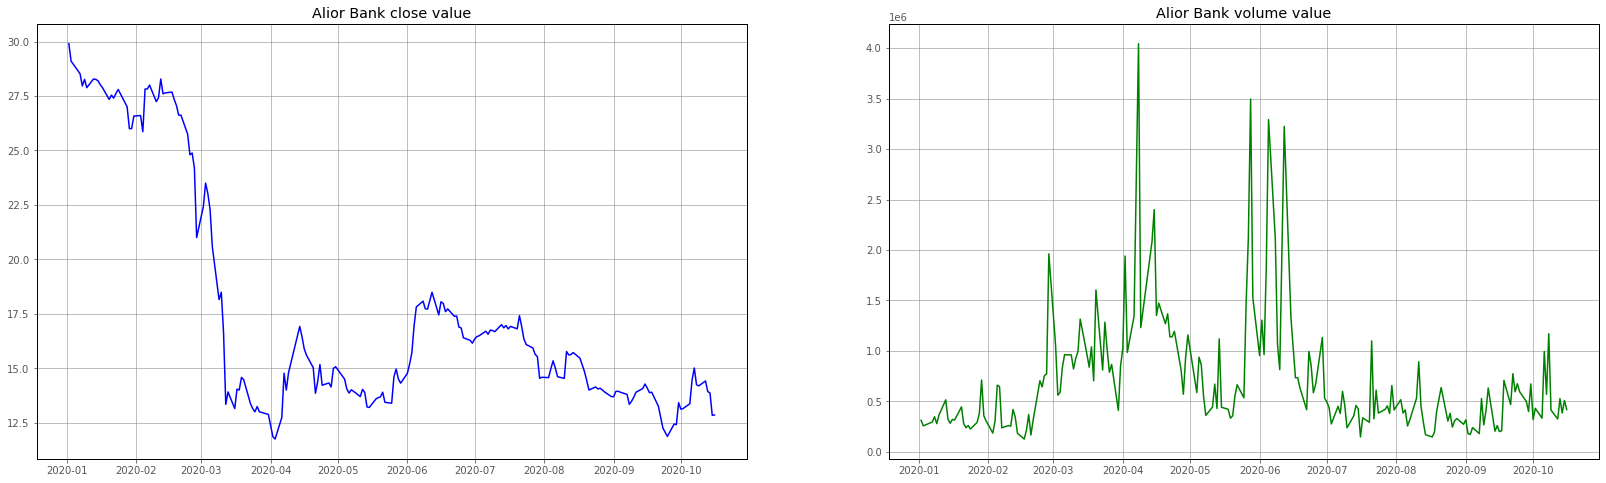

In [158]:
stock_visualization('Alior Bank')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


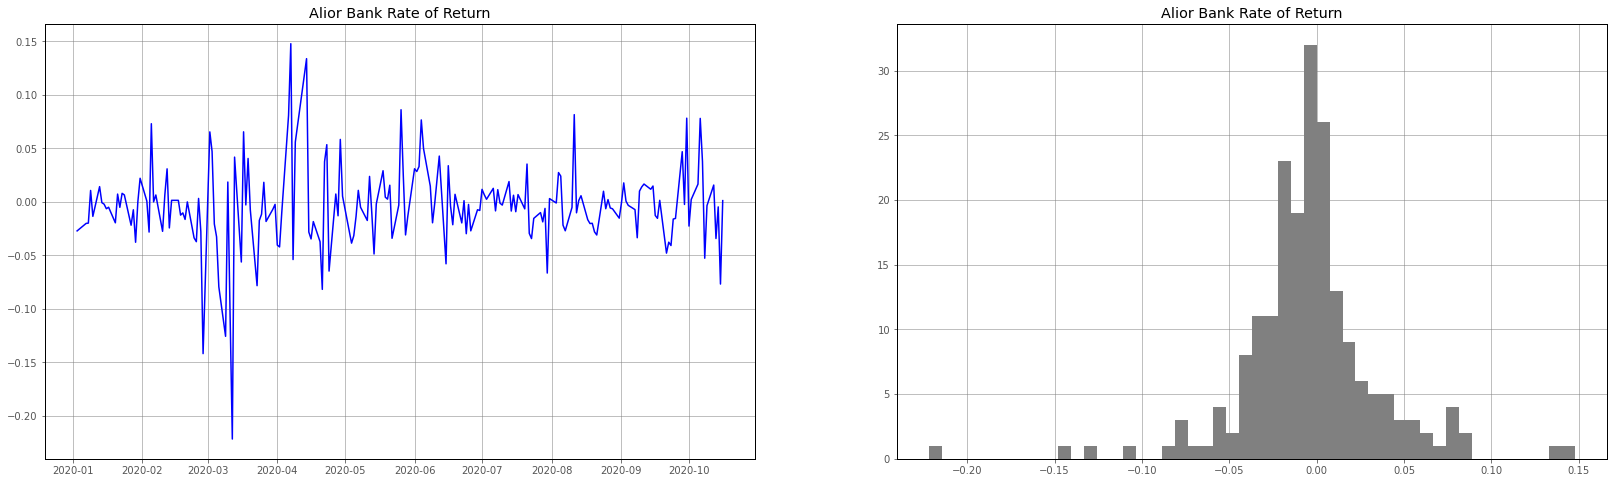

In [159]:
stock_rate('Alior Bank')

# Portfolio

In [18]:
WIG20_by_stocks.size().to_frame().index

Index(['Alior Bank', 'Bank Polska Kasa Opieki', 'CCC', 'CD Projekt',
       'Cyfrowy Polsat SA', 'Dino Polska', 'Grupa Lotos SA',
       'Jastrzebska Spolka Weglowa', 'KGHM Polska Mied', 'LPP',
       'Orange Polska', 'PGE Polska Grupa Energetyczna',
       'Play Communications SA', 'Polskie Gronictwo Naftowe i Gazownictwo',
       'Powszechna Kasa Oszczednosci Bank Polski',
       'Powszechny Zaklad Ubezpieczen', 'Santander Bank Polska',
       'Tauron Polska Energia', 'WIG20', 'mBank'],
      dtype='object', name='Stock_name')

In [209]:
#Our Investment
stocks = ['Alior Bank','LPP','CD Projekt','mBank']
values_investment = [1000,2500,1000,5000]
investment = creat_investment(stocks,values_investment)

#Benchmark
benchmark = ['WIG20']
sum_investment = investment['Value'].sum() # If Benchmark have more than one company change like up


benchmark_portfolio = preparing_portfolio(sum_investment, benchmark)

my_portfolio = preparing_portfolio(investment['Value'].values,investment['Stock'])

--------------------------------------------------
We first want to inveset 9500.0 PLN
We get
4 stocks WIG20 for 2200.1 PLN total 8800.4 PLN
and the rest from investment 699.6 PLN
--------------------------------------------------
We first want to inveset 9500.0 PLN
We get
33 stocks Alior Bank for 29.9 PLN total 986.7 PLN
3 stocks CD Projekt for 286.8 PLN total 860.4 PLN
0 stocks LPP for 8845.0 PLN total 0.0 PLN
12 stocks mBank for 394.4 PLN total 4732.8 PLN
and the rest from investment 2920.1 PLN


In [192]:
#my_portfolio.loc[:, pd.IndexSlice[['Close','Investments_value','ROI'], 'Alior Bank']]
my_portfolio.head()

29.9

--------------------------------------------------
At 2020-01-02 We invested 6579.9 PLN, spliced by company
986.7 PLN at stocks Alior Bank
860.4 PLN at stocks CD Projekt
0.0 PLN at stocks LPP
4732.8 PLN at stocks mBank
--------------------------------------------------
We have 
33 stocks Alior Bank
3 stocks CD Projekt
0 stocks LPP
12 stocks mBank
--------------------------------------------------
On 2020-10-16 it is all worth 3358.47 PLN,spliced by company
424.28 PLN at stocks Alior Bank
1135.73 PLN at stocks CD Projekt
0.0 PLN at stocks LPP
1798.46 PLN at stocks mBank
--------------------------------------------------
Rate of investment is -48.96 %, spliced by comapny
-57.0 % at stocks Alior Bank
32.0 % at stocks CD Projekt
nan % at stocks LPP
-62.0 % at stocks mBank
--------------------------------------------------



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


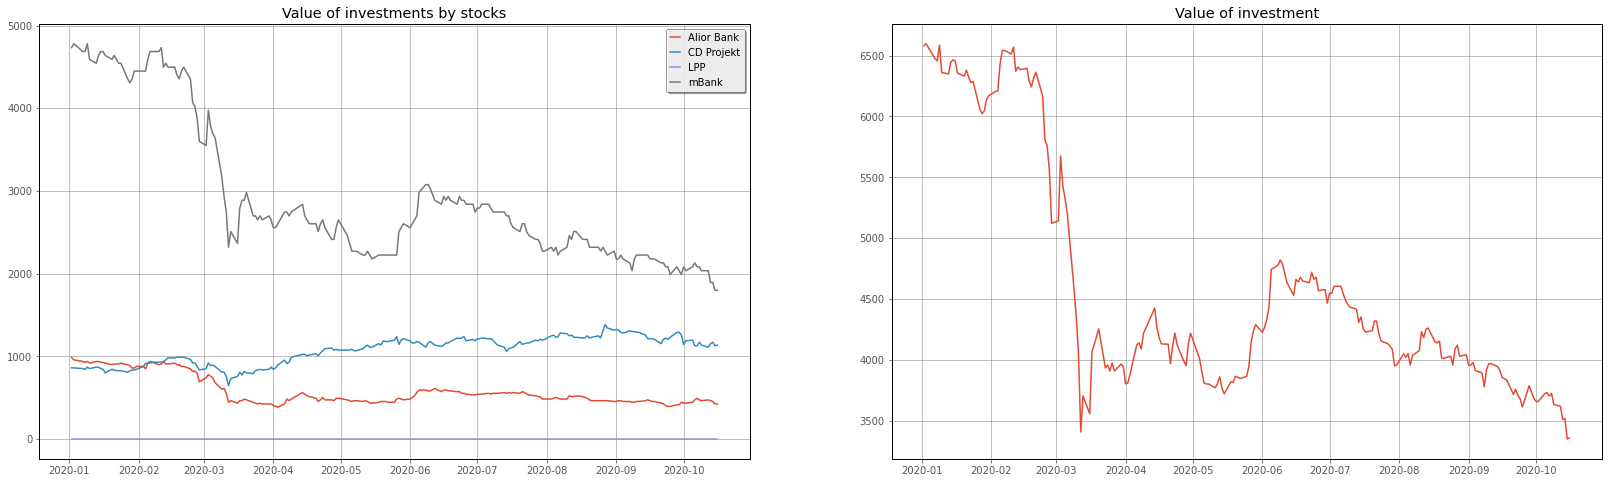

In [220]:
portfolio_summary(my_portfolio)

--------------------------------------------------
At 2020-01-02 We invested 6579.9 PLN at Alior Bank, CD Projekt, LPP, mBank
--------------------------------------------------
On 2020-10-16 is worth 3358.47 PLN, Rate of investment is -48.96 %
Ratio investment to benchmark is -49.12%
--------------------------------------------------



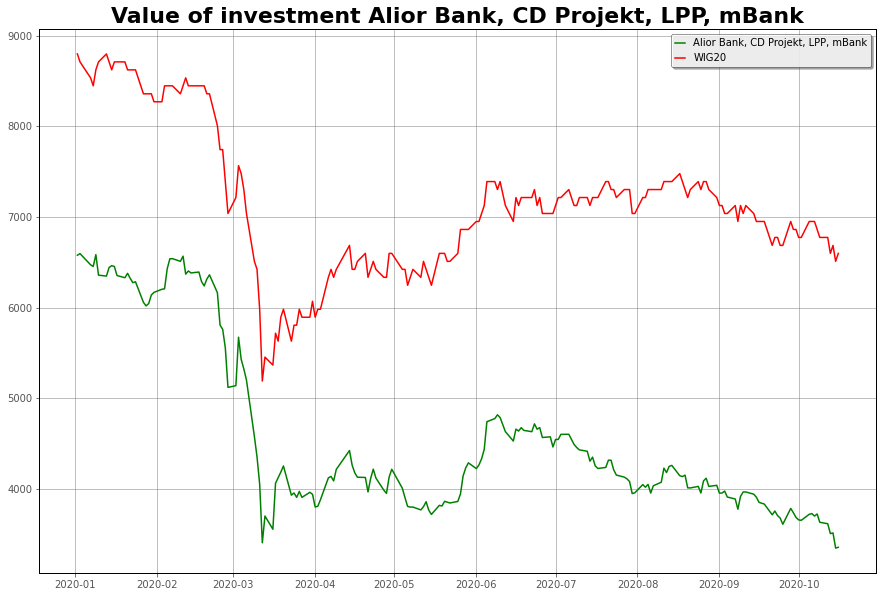

In [202]:
portfolio_compare(my_portfolio,benchmark_portfolio)

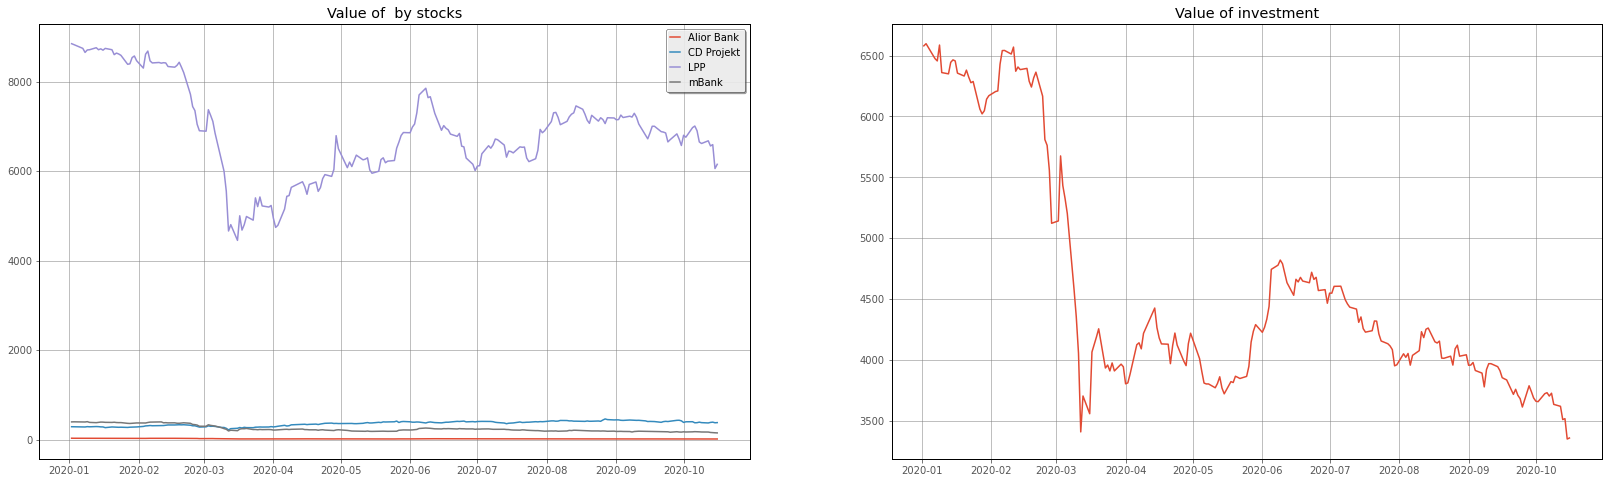

In [ ]:
make_graphics(my_portfolio)

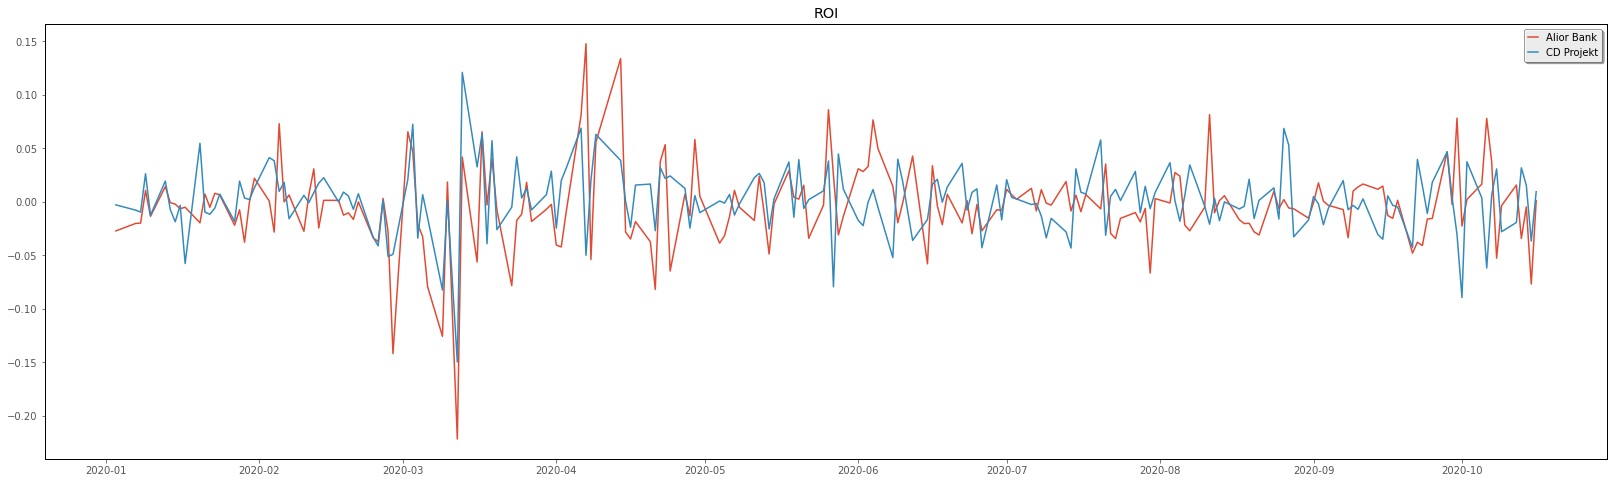

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


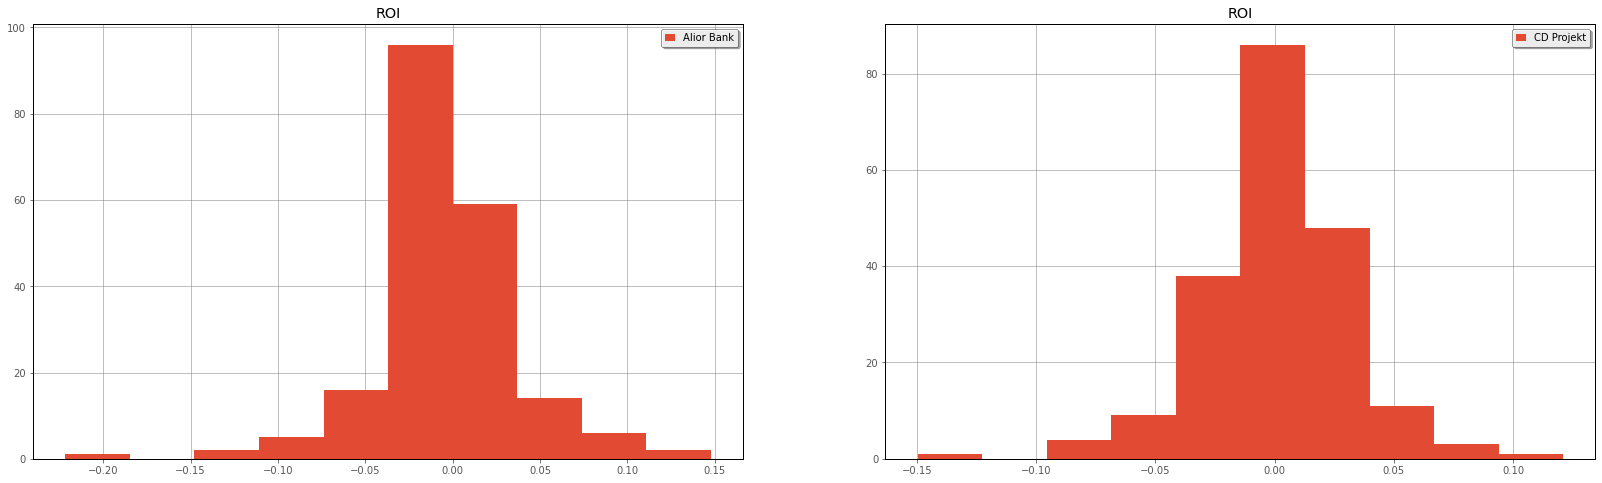

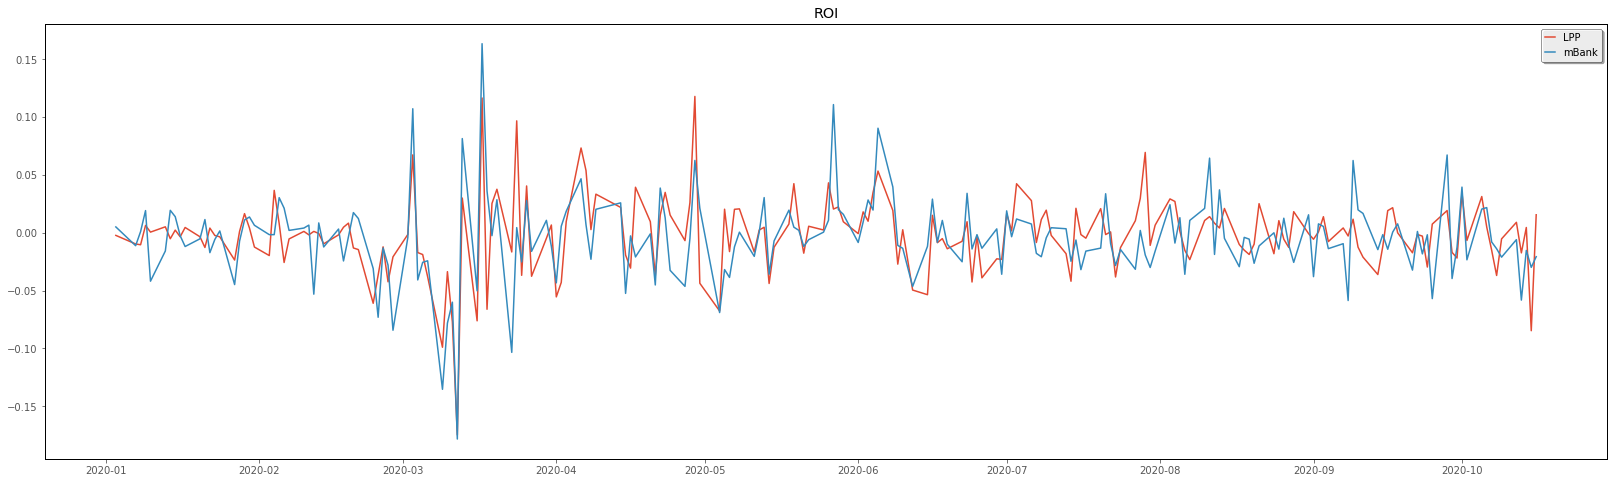

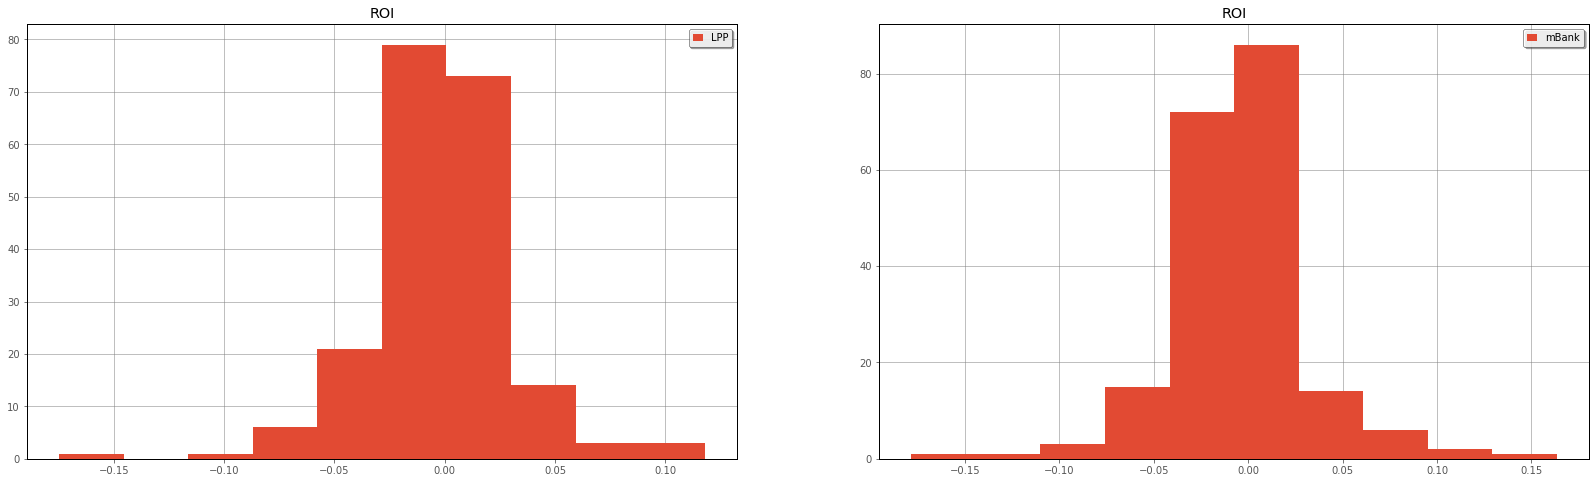

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

<Figure size 2016x576 with 0 Axes>

In [ ]:
relative_change(my_portfolio)